### Задание 1
Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

Мной взяты данные Всемирного доклада о счастье (World Happiness Report) за 2023 год. Это ежегодный доклад, публикуемый подразделением ООН по поиску решений стабильного развития (англ. UN Sustainable Development Solutions Network).

В нем представлены страны мира с группировкой по регионам и их оценки по следующим метрикам:
- Общая оценка
- ВВП на душу
- Социальная поддержка
- Продолжительность жизни
- Свобода выбора
- Щедрость
- Оценка коррупции

In [1]:
import pandas as pd
df = pd.read_csv('data/WHR_2023.csv', sep=',')

### Задание 2
Вывести информацию о данных при помощи методов `.info()`, `.head()`. Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [3]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [4]:
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

### Задание 3
Построить столбчатую диаграмму (`.bar`) с использованием модуля `graph_objs` из библиотеки `Plotly` со следующими параметрами:
1. По оси Х указать дату или название, по оси У указать количественный показатель.  
2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (`marker=dict(color=признак, coloraxis="coloraxis")`). 
3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2. 
4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста. 
5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315. 
6. Размер текста меток осей сделать равным 14. 
7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей. 
8. Добавить сетку на график, сделать её цвет `'ivory'` и толщину равную 2. (Можно сделать это при настройке осей с помощью `gridwidth=2, gridcolor='ivory'`) 
9. Убрать лишние отступы по краям. 

In [5]:
import plotly
import plotly.graph_objs as go  # в задании сказано использовать его, но экспресс удобнее
import plotly.express as px

data = df[['region', 'happiness_score']]
data = data.groupby('region', as_index=False).mean().sort_values('happiness_score')

bar = px.bar(data, x='region', y='happiness_score')
bar.update_traces(marker=dict(color=data['happiness_score'], coloraxis="coloraxis"))
bar.update_traces(marker_line_width=2, marker_line_color='black')

bar.update_layout(title=dict(text='Mean happiness by region', x=0.5, font={'size': 20}))
bar.update_layout(
    xaxis=dict(tickangle=315, title={'text': 'Region', 'font': {'size': 16}}),
    yaxis=dict(title={'text': 'Happiness score', 'font': {'size': 16}})
)
bar.update_layout(
    xaxis=dict(tickfont={'size': 14}),
    yaxis=dict(tickfont={'size': 14})
)
bar.update_layout(width=None, height=700)
bar.update_layout(
    xaxis=dict(gridwidth=2, gridcolor='ivory'),
    yaxis=dict(gridwidth=2, gridcolor='ivory')
)
bar.update_layout(margin=dict(l=0, r=0, b=0))

bar.show()


На графике можно видеть, что в среднем наинизший уровень счастья имеют страны Южной Азии и Тропической Африки, а наивысший - страны Западной Европы, Северной Америки, Австралия и Новая Зеландия.

### Задание 4
Построить круговую диаграмму (`go.Pie`), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

In [6]:
pie = px.pie(data, names='region', values='happiness_score')

pie.update_traces(marker=dict(line=dict(color='black', width=2)), textinfo='value+label')

pie.update_layout(title=dict(text='Mean happiness by region', x=0.5, font={'size': 20}))
pie.update_layout(width=None, height=700, margin=dict(l=0, r=0, b=0))

pie.show()


### Задание 5
Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки `matplotlib`. Сделать вывод.
1. Сделать график с линиями и маркерами, цвет линии `'crimson'`, цвет точек `'white'`, цвет границ точек `'black'`, толщина границ точек равна 2.
2. Добавить сетку на график, сделать её цвет `'mistyrose'` и толщину равную 2. (Можно сделать это при настройке осей с помощью `linewidth=2, color='mistyrose'`). 

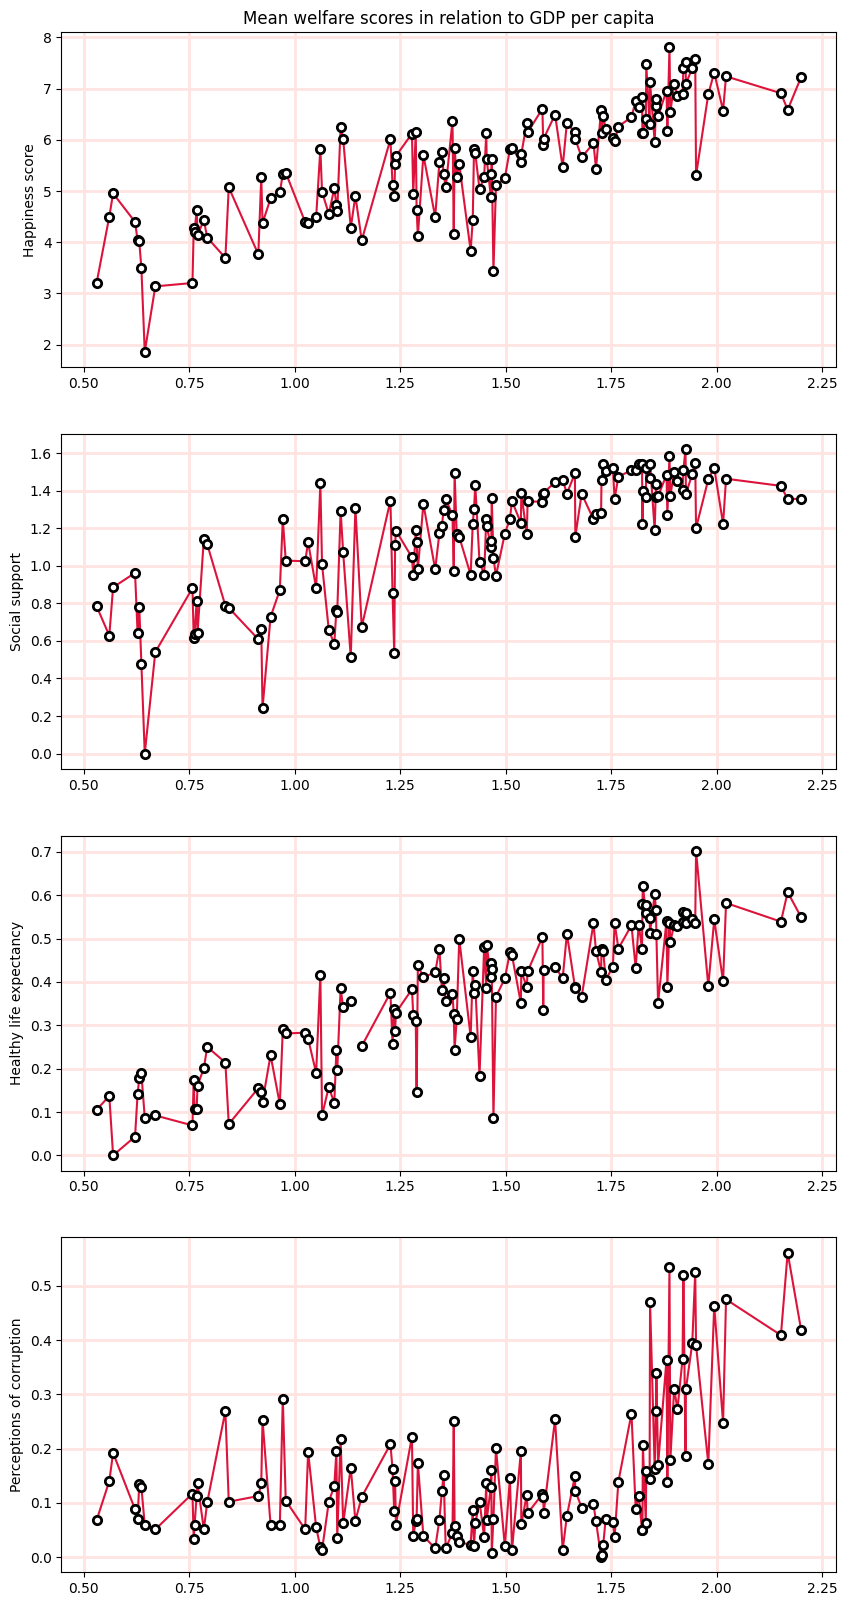

In [7]:
import matplotlib.pyplot as plt

params = ['gdp_per_capita', 'happiness_score', 'social_support', 'healthy_life_expectancy', 'perceptions_of_corruption']

data = df[params]
data = data.loc[(data['gdp_per_capita'] > 0)].groupby('gdp_per_capita', as_index=False).mean()

fig, axs = plt.subplots(len(params[1:]), figsize=(10, 20))
for i, param in enumerate(params[1:]):
    axs[i].plot(data['gdp_per_capita'], data[param], '-o', color='crimson', markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    axs[i].grid(linewidth=2, color='mistyrose')
    axs[i].set_ylabel(param[0].upper() + param[1:].replace('_', ' '))

axs[0].set_title('Mean welfare scores in relation to GDP per capita')
plt.show()

Из полученных графиков можно заметить линейную зависимость показателей счастья, соц. поддержки и продолжительности жизни от показателя ВВП на душу населения. Зависимость оценки коррупции (чем ниже оценка, тем больше коррупции) показывает другой тренд: оценка стабильно низкая на большом диапазоне значений ВВП на душу, и лишь при наибольших значениях ВВП оценка коррупции возрастает. 

Библиотека Pyplot мне показалась несколько удобнее в использовании, чем Matplotlib, во многом за счет того, что с графиками можно взаимодействовать и точно смотреть нужные значения.